In [1]:
# importing necessary libraries and configurations
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

%matplotlib inline

In [2]:
# loading the data set
df = pd.read_csv("df_53.csv")

In [3]:
# data cleaning and indexing 
df.drop("zip_code", axis=1, inplace=True)

df.occurred_date_time = df.occurred_date_time.astype("datetime64")
df.set_index(["occurred_date_time"], inplace=True)
df.sort_index(inplace=True)

# examining the new data frame
display(df.head())
display(df.tail())

incident_number highest_offense_description  \
occurred_date_time                                                 
2003-01-01 00:00:00      20105018815              IDENTITY THEFT   
2003-01-01 00:01:00      20035007933                  HARASSMENT   
2003-01-01 00:01:00    2003924477485     STATUTORY RAPE OF CHILD   
2003-01-01 00:01:00      20035016697       THEFT BY EMBEZZLEMENT   
2003-01-01 00:01:00    2003924376595           CRIMINAL MISCHIEF   

                        report_date_time                 location_type  \
occurred_date_time                                                       
2003-01-01 00:00:00  2010-04-14 14:59:00              RESIDENCE / HOME   
2003-01-01 00:01:00  2003-08-25 11:37:00              RESIDENCE / HOME   
2003-01-01 00:01:00  2003-04-25 12:51:00              RESIDENCE / HOME   
2003-01-01 00:01:00  2003-10-13 08:49:00  COMMERCIAL / OFFICE BUILDING   
2003-01-01 00:01:00  2003-01-01 13:11:00         PARKING LOTS / GARAGE   

                                     address  council_district apd_sector  \
occurred_date_time                                                          
2003-01-01 00:00:00            1088 PARK PLZ               4.0         ED   
2003-01-01 00:01:00    9725 N I 35 NB SVC RD               NaN         ED   
2003-01-01 00:01:00  300 BLOCK W RUNDBERG LN               4.0         ED   
2003-01-01 00:01:00        313 E RUNDBERG LN               4.0         ED   
2003-01-01 00:01:00    8800 N I 35 SB SVC RD               4.0         ID   

                     apd_district   latitude  longitude  year  month  week  \
occurred_date_time                                                           
2003-01-01 00:00:00           3.0  30.348871 -97.685233  2003      1     1   
2003-01-01 00:01:00           7.0  30.361871 -97.685342  2003      1     1   
2003-01-01 00:01:00           1.0        NaN        NaN  2003      1     1   
2003-01-01 00:01:00           1.0  30.359639 -97.691895  2003      1     1   
2003-01-01 00:01:00           2.0  30.352849 -97.691828  2003      1     1   

                     day  hour  
occurred_date_time              
2003-01-01 00:00:00    1     0  
2003-01-01 00:01:00    1     0  
2003-01-01 00:01:00    1     0  
2003-01-01 00:01:00    1     0  
2003-01-01 00:01:00    1     0

incident_number highest_offense_description  \
occurred_date_time                                                 
2020-11-28 00:00:00      20205048498         BURGLARY OF VEHICLE   
2020-11-28 14:20:00      20205048495                       THEFT   
2020-11-28 15:41:00      20205048502       BURGLARY OF RESIDENCE   
2020-11-28 16:00:00      20205048530           CRIMINAL MISCHIEF   
2020-11-28 19:30:00      20205048535    BURG NON RESIDENCE SHEDS   

                        report_date_time          location_type  \
occurred_date_time                                                
2020-11-28 00:00:00  2020-11-28 16:40:00  PARKING LOTS / GARAGE   
2020-11-28 14:20:00  2020-11-28 15:40:00  GROCERY / SUPERMARKET   
2020-11-28 15:41:00  2020-11-28 17:12:00       RESIDENCE / HOME   
2020-11-28 16:00:00  2020-11-28 20:19:00  PARKING LOTS / GARAGE   
2020-11-28 19:30:00  2020-11-28 20:58:00        OTHER / UNKNOWN   

                                  address  council_district apd_sector  \
occurred_date_time                                                       
2020-11-28 00:00:00  8800 N IH 35 SVRD SB               4.0         ED   
2020-11-28 14:20:00   500 CANYON RIDGE DR               7.0         ED   
2020-11-28 15:41:00    1401 E RUNDBERG LN               4.0         ED   
2020-11-28 16:00:00        9200 NORTH PLZ               4.0         ED   
2020-11-28 19:30:00       611 W POWELL LN               4.0         ED   

                     apd_district   latitude  longitude  year  month  week  \
occurred_date_time                                                           
2020-11-28 00:00:00           1.0  30.352251 -97.692821  2020     11    48   
2020-11-28 14:20:00           6.0  30.405264 -97.671896  2020     11    48   
2020-11-28 15:41:00           3.0  30.351630 -97.678320  2020     11    48   
2020-11-28 16:00:00           3.0  30.354602 -97.685849  2020     11    48   
2020-11-28 19:30:00           1.0  30.349583 -97.707294  2020     11    48   

                     day  hour  
occurred_date_time              
2020-11-28 00:00:00   28     0  
2020-11-28 14:20:00   28    14  
2020-11-28 15:41:00   28    15  
2020-11-28 16:00:00   28    16  
2020-11-28 19:30:00   28    19

In [4]:
# Creating violent crime and murder data frames for analysis
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_mur = df[df.highest_offense_description == "MURDER"]
df_mur_cap = df[df.highest_offense_description == "CAPITAL MURDER"]
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]
df_rape = df[df.highest_offense_description == "RAPE"]


# Annual overall crime (2017-present)
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime (2017-present)
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders (2017-present)
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

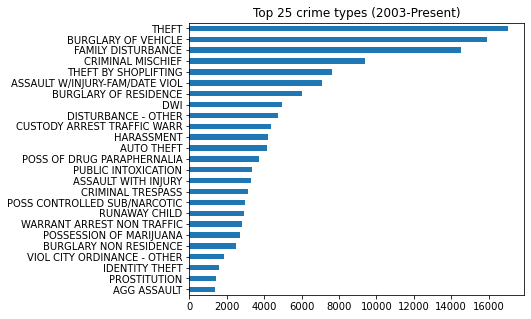

----------------------------------------------------------
----------------------------------------------------------


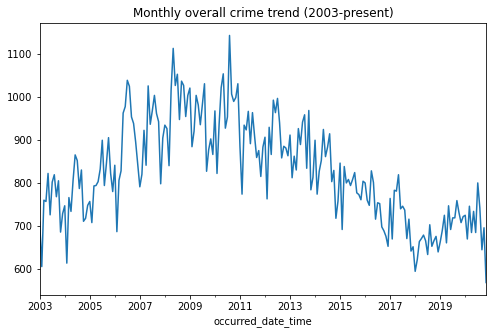

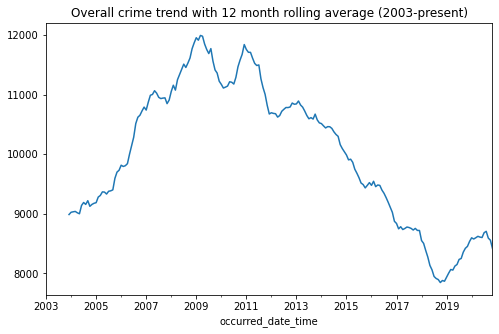

----------------------------------------------------------
----------------------------------------------------------


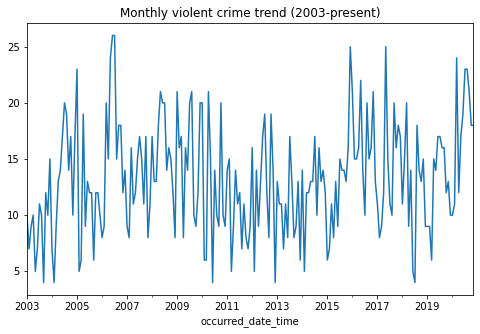

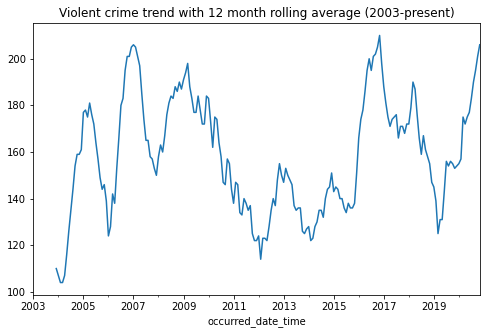

In [5]:
# Top 25 crime types
df.highest_offense_description.value_counts().head(25).sort_values().plot.barh(
    figsize=(6, 5), title="Top 25 crime types (2003-Present)"
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

df.resample("M").size().plot(
    title="Monthly overall crime trend (2003-present)", figsize=(8, 5)
)
plt.show()

# Violent crime trend with a year rolling average
df.resample("M").size().rolling(12).sum().plot(
    title="Overall crime trend with 12 month rolling average (2003-present)",
    figsize=(8, 5),
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

# Plotting violent crime trend on a monthly basis
df_viol.resample("M").size().plot(
    title="Monthly violent crime trend (2003-present)", figsize=(8, 5)
)
plt.show()

# Violent crime trend with a year rolling average
df_viol.resample("M").size().rolling(12).sum().plot(
    title="Violent crime trend with 12 month rolling average (2003-present)",
    figsize=(8, 5),
)
plt.show()

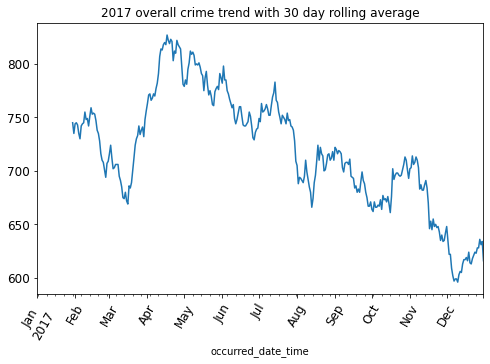

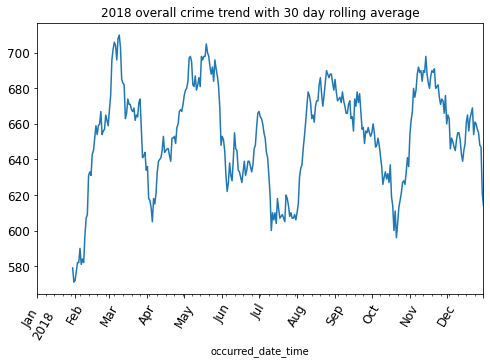

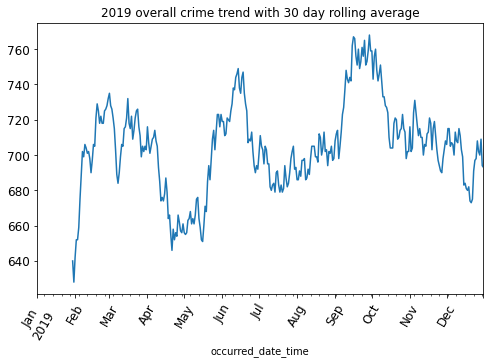

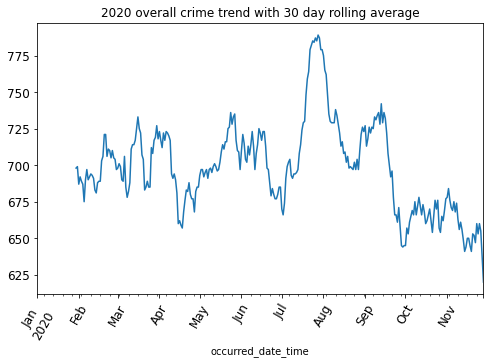

In [10]:
df_17.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    figsize=(8, 5),
    rot=60,
    title="2017 overall crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_18.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    figsize=(8, 5),
    rot=60,
    title="2018 overall crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_19.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    figsize=(8, 5),
    rot=60,
    title="2019 overall crime trend with 30 day rolling average",
)
plt.show()

print("==============================================================================")
print("==============================================================================")

df_20.resample("D").size().rolling(30).sum().plot(
    fontsize=12,
    figsize=(8, 5),
    rot=60,
    title="2020 overall crime trend with 30 day rolling average",
)
plt.show()

# ax = df_20.plot(x="year", figsize=(10, 6), label="overall crime")
# df_viol_20.plot(x="year", label="violent crime", ax=ax, rot=60)
# plt.show()

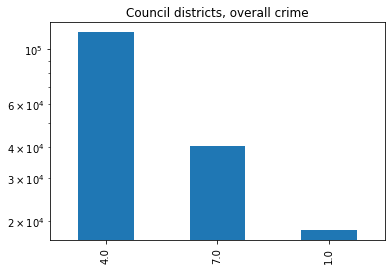

----------------------------------------------------------


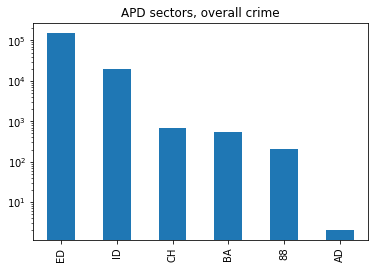

----------------------------------------------------------


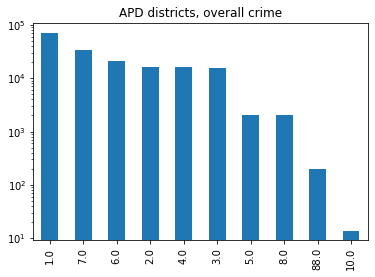

In [6]:
# Showing overall crime rates by council districts, APD districts, and sectors
df.council_district.value_counts().plot.bar(
    title="Council districts, overall crime", logy=True
)
plt.show()

print("----------------------------------------------------------")

df.apd_sector.value_counts().plot.bar(title="APD sectors, overall crime", logy=True)
plt.show()

print("----------------------------------------------------------")

df.apd_district.value_counts().plot.bar(title="APD districts, overall crime", logy=True)
plt.show()

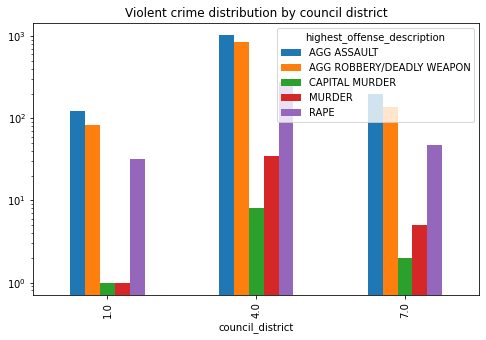

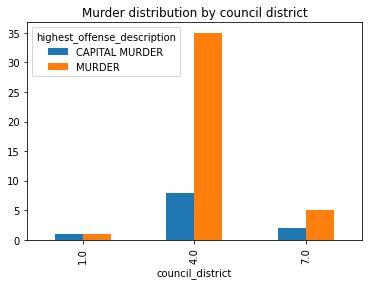

----------------------------------------------------------
----------------------------------------------------------


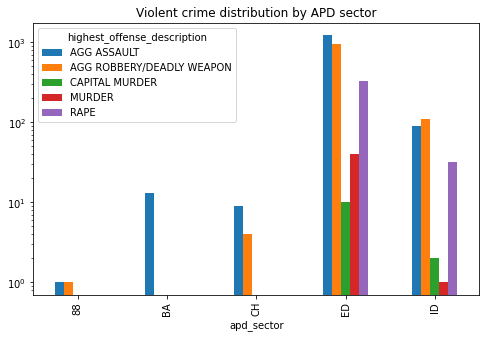

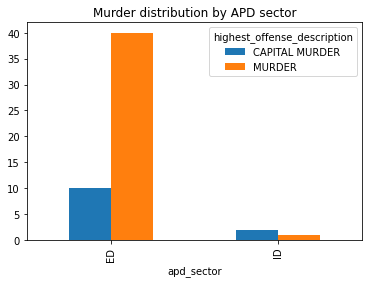

----------------------------------------------------------
----------------------------------------------------------


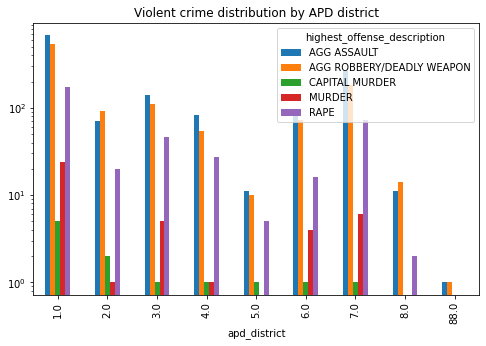

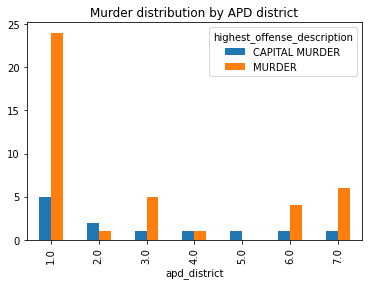

In [7]:
# Showing violent crime and murder rates by council districts, APD districts, and sectors
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(8, 5), logy=True, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(title="Murder distribution by council district")
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(8, 5), logy=True, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    title="Murder distribution by APD sector"
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(8, 5), logy=True, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    title="Murder distribution by APD district"
)
plt.show()

highest_offense_description                     AGG ASSAULT  \
location_type                                                 
ABANDONED/CONDEMNED STRUCTURE                             1   
AUTO DEALERSHIP NEW / USED                                0   
BANKS / SAVINGS & LOAN                                    0   
BAR / NIGHT CLUB                                         58   
CAMP / CAMPGROUND                                         1   
COMMERCIAL / OFFICE BUILDING                             24   
COMMUNITY CENTER                                          1   
CONSTRUCTION SITE                                         2   
CONVENIENCE STORE                                        17   
DEPARTMENT / DISCOUNT STORE                               9   
DRUG STORE / DR. OFFICE / HOSPITAL                        2   
FIELD / WOODS                                            32   
GAMBLING FACILITY / CASINO / RACE TRACK                   0   
GAS / SERVICE STATIONS                                   26   
GOVERNMENT / PUBLIC BUILDING                              0   
GROCERY / SUPERMARKET                                     4   
HOTEL / MOTEL / ETC.                                     76   
LAKE / WATERWAY                                           0   
LIQUOR STORE                                              1   
OTHER / UNKNOWN                                          18   
PARK / PLAYGROUND                                         6   
PARKING LOTS / GARAGE                                   360   
RENTAL STORAGE FACILITY                                   1   
RESIDENCE / HOME                                        344   
REST AREA                                                 0   
RESTAURANTS                                              11   
SCHOOL - COLLEGE / UNIVERSITY                             1   
SCHOOLS / COLLEGES                                        2   
SHOPPING MALL                                             1   
SPECIALTY  STORE (TV  FUR ETC.)                           2   
STREETS / HWY / ROAD / ALLEY                            348   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)            1   

highest_offense_description                     AGG ROBBERY/DEADLY WEAPON  \
location_type                                                               
ABANDONED/CONDEMNED STRUCTURE                                           3   
AUTO DEALERSHIP NEW / USED                                              1   
BANKS / SAVINGS & LOAN                                                  8   
BAR / NIGHT CLUB                                                        6   
CAMP / CAMPGROUND                                                       0   
COMMERCIAL / OFFICE BUILDING                                           54   
COMMUNITY CENTER                                                        0   
CONSTRUCTION SITE                                                       0   
CONVENIENCE STORE                                                      39   
DEPARTMENT / DISCOUNT STORE                                            12   
DRUG STORE / DR. OFFICE / HOSPITAL                                      3   
FIELD / WOODS                                                           5   
GAMBLING FACILITY / CASINO / RACE TRACK                                 2   
GAS / SERVICE STATIONS                                                 33   
GOVERNMENT / PUBLIC BUILDING                                            0   
GROCERY / SUPERMARKET                                                   7   
HOTEL / MOTEL / ETC.                                                   58   
LAKE / WATERWAY                                                         2   
LIQUOR STORE                                                            2   
OTHER / UNKNOWN                                                        23   
PARK / PLAYGROUND                                                       1   
PARKING LOTS / GARAGE                                                 426   
RENTAL ST

----------------------------------------------------------
----------------------------------------------------------


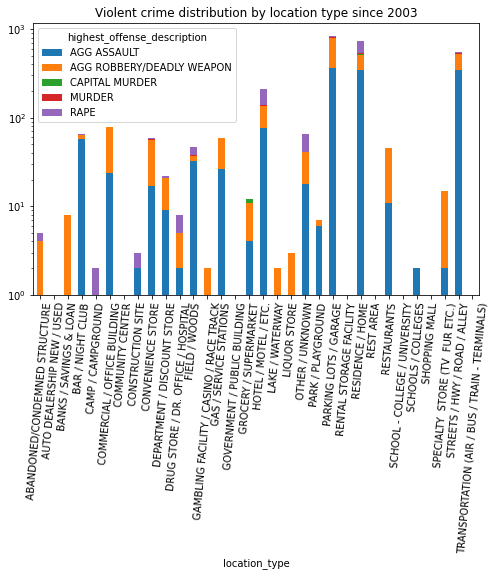

----------------------------------------------------------
----------------------------------------------------------


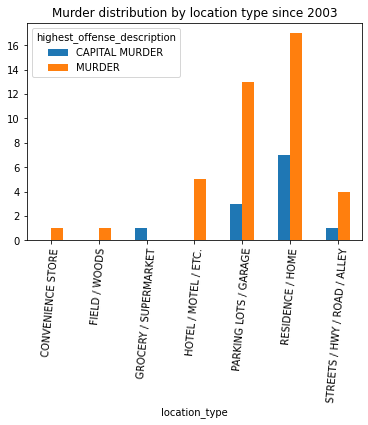

In [8]:
# Showing violent crime and murder rates by location type
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)

print("----------------------------------------------------------")
print("----------------------------------------------------------")

mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

viol_loc.plot.bar(
    stacked=True,
    figsize=(8, 5),
    logy=True,
    rot=85,
    title="Violent crime distribution by location type since 2003",
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

mur_loc.plot.bar(rot=85, title="Murder distribution by location type since 2003")
plt.show()

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


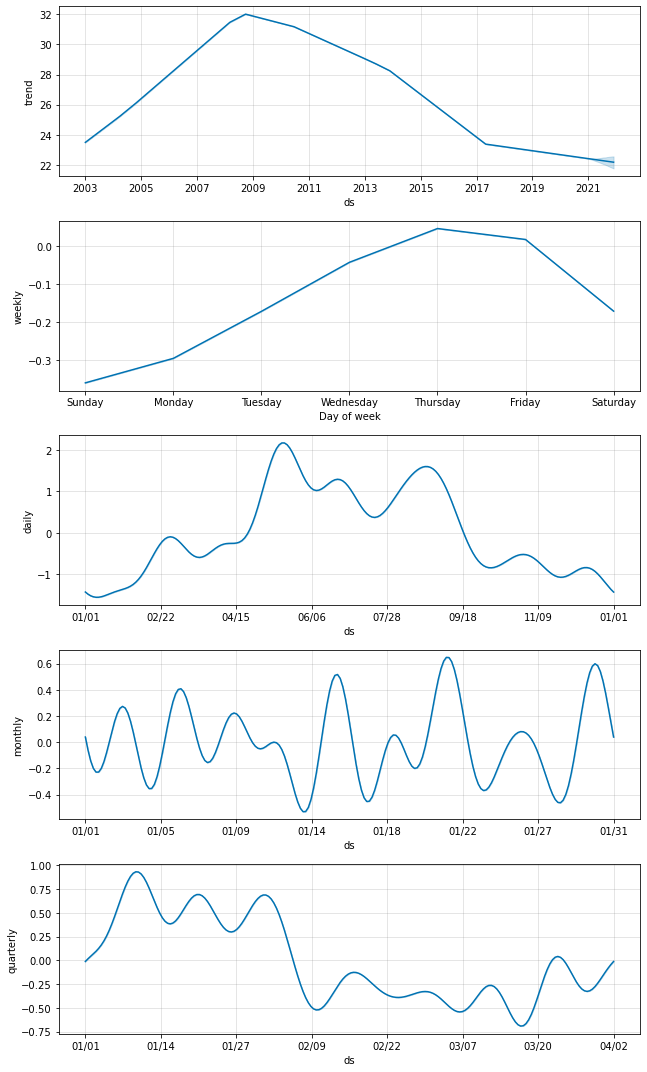

In [9]:
df_fbprophet = df

df_m = df_fbprophet.resample("D").size().reset_index()
df_m.columns = ["date", "daily_crime_count"]
df_m_final = df_m.rename(columns={"date": "ds", "daily_crime_count": "y"})

m = Prophet(interval_width=0.95, yearly_seasonality=False)
m.add_seasonality(name="monthly", period=30.5, fourier_order=10)
m.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
m.add_seasonality(name="weekly", period=52, fourier_order=10)
m.add_seasonality(name="daily", period=365, fourier_order=10)
m.fit(df_m_final)

future = m.make_future_dataframe(periods=365, freq="D")
pred = m.predict(future)

fig2 = m.plot_components(pred)
fig2_1 = plot_plotly(m, pred)
fig2_1